In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
data = pd.read_csv('./Resources/us_disaster.csv')
data.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64092 entries, 0 to 64091
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     64092 non-null  object
 1   disaster_number             64092 non-null  int64 
 2   state                       64092 non-null  object
 3   declaration_type            64092 non-null  object
 4   declaration_date            64092 non-null  object
 5   fy_declared                 64092 non-null  int64 
 6   incident_type               64092 non-null  object
 7   declaration_title           64092 non-null  object
 8   ih_program_declared         64092 non-null  int64 
 9   ia_program_declared         64092 non-null  int64 
 10  pa_program_declared         64092 non-null  int64 
 11  hm_program_declared         64092 non-null  int64 
 12  incident_begin_date         64092 non-null  object
 13  incident_end_date           55682 non-null  ob

## 1. Task: Visualize the Frequency of Each Incident Type

What are the different incident types in the dataset, and how frequently do they occur?

- How many different incident types are present in the dataset, and what are they?

- Which incident type occurs most frequently, and which one occurs the least?

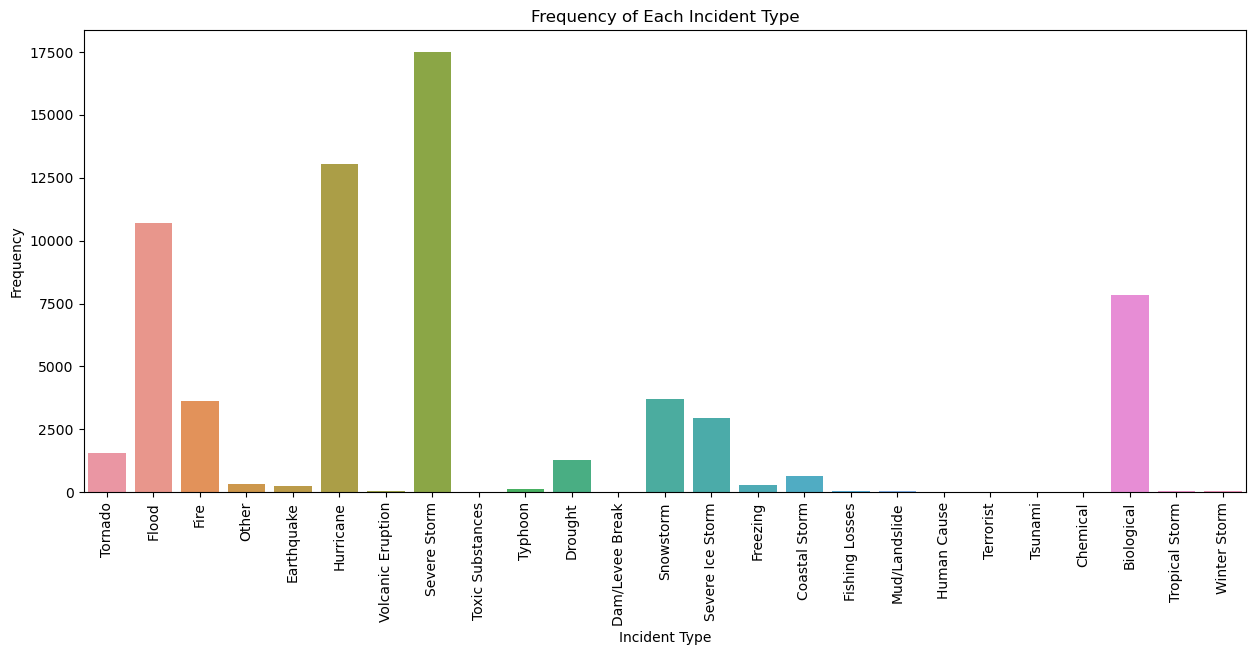

In [4]:
# Visualize the frequency of each incident type
plt.figure(figsize=(15, 6))
sns.countplot(x='incident_type', data=data)
plt.title('Frequency of Each Incident Type')
plt.xlabel('Incident Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## 2. Task: Visualize the Trend of Disaster Declarations Over the Years

How has the number of disaster declarations changed over the years? Are there any noticeable trends or patterns?

- Are there any noticeable patterns or trends in the number of disaster declarations over the years?

- In which years did we observe a significant increase or decrease in disaster declarations?

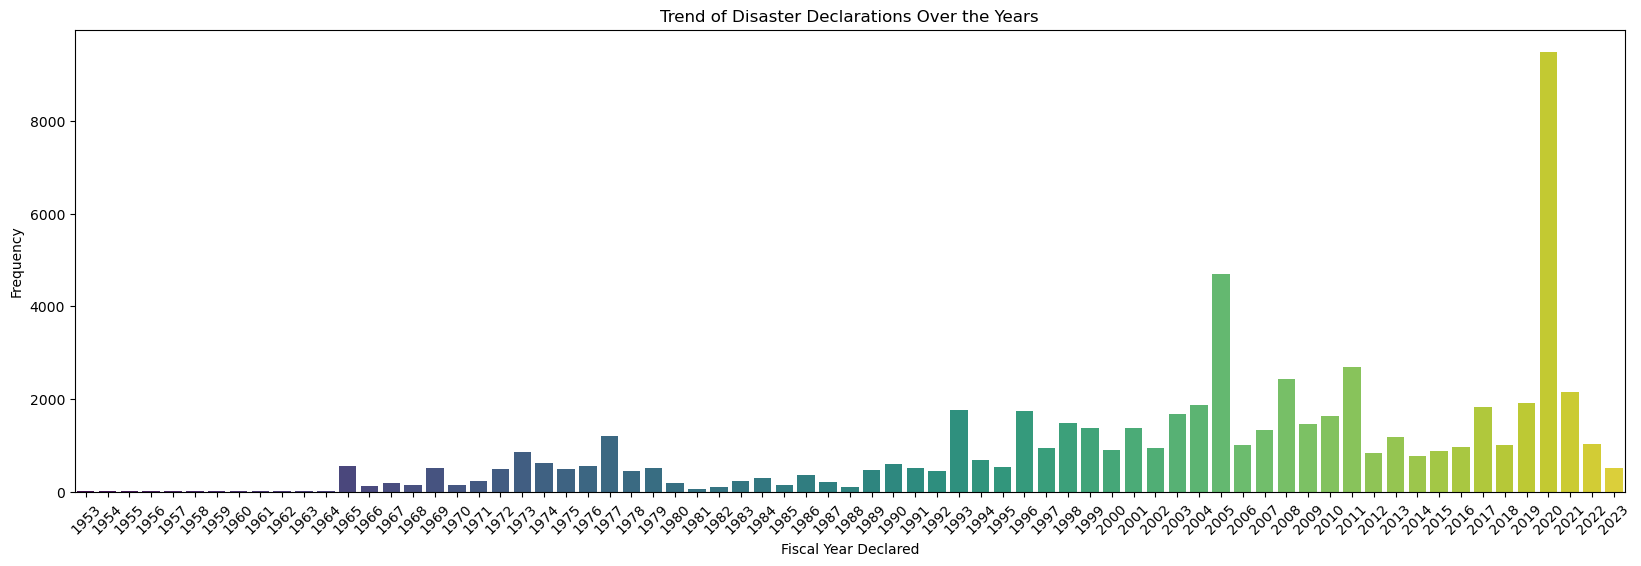

In [5]:
# Visualize the trend of disaster declarations over the years
fig, ax = plt.subplots(figsize=(20, 6))
sns.countplot(x='fy_declared', data=data, palette='viridis', ax=ax)
plt.title('Trend of Disaster Declarations Over the Years')
plt.xlabel('Fiscal Year Declared')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## 3. Task: Visualize the Top States Facing Disasters

Which states in the United States have experienced the highest frequency of disasters?

- Which states in the United States have the highest frequency of facing disasters?

- Is there a significant difference in the number of disasters between the top states and others?

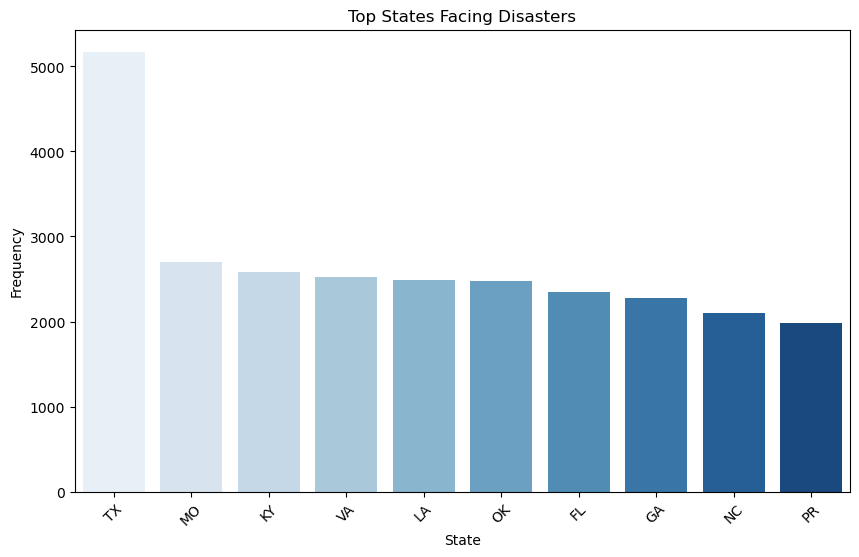

In [6]:
# Visualize the top states facing disasters
top_states = data['state'].value_counts().nlargest(10)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette='Blues', ax=ax)
plt.title('Top States Facing Disasters')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## 4. Task: Visualize the Distribution of Incident Type Occurrences

How is the occurrence of different incident types distributed in the dataset? Are some incident types more common than others?


- How are the different incident types distributed in the dataset?

- Are some incident types considerably more common than others?

/var/folders/t1/18wjd24j1v3bs98g33bz6yh40000gn/T/ipykernel_98614/107528070.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['incident_type'].value_counts())


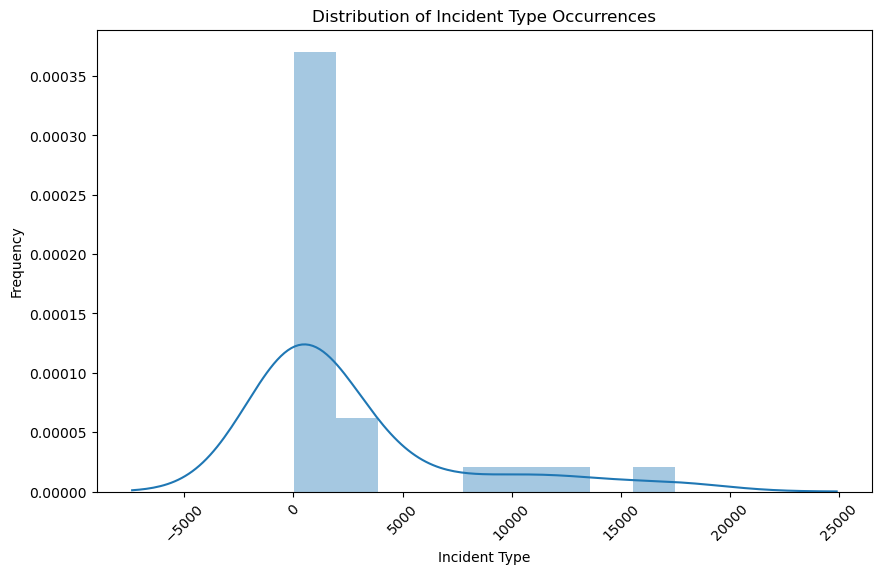

In [7]:
# Visualization 5: Distribution of incident_type occurrences
plt.figure(figsize=(10, 6))
sns.distplot(data['incident_type'].value_counts())
plt.title('Distribution of Incident Type Occurrences')
plt.xlabel('Incident Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## 5. Task: Visualize the Top Incident Type in Each Fiscal Year

What was the most frequent incident type declared in each fiscal year? Are there any recurring incident types?

- What was the most frequent incident type declared in each fiscal year?

- Are there any incident types that consistently appear as the most frequent over multiple years?

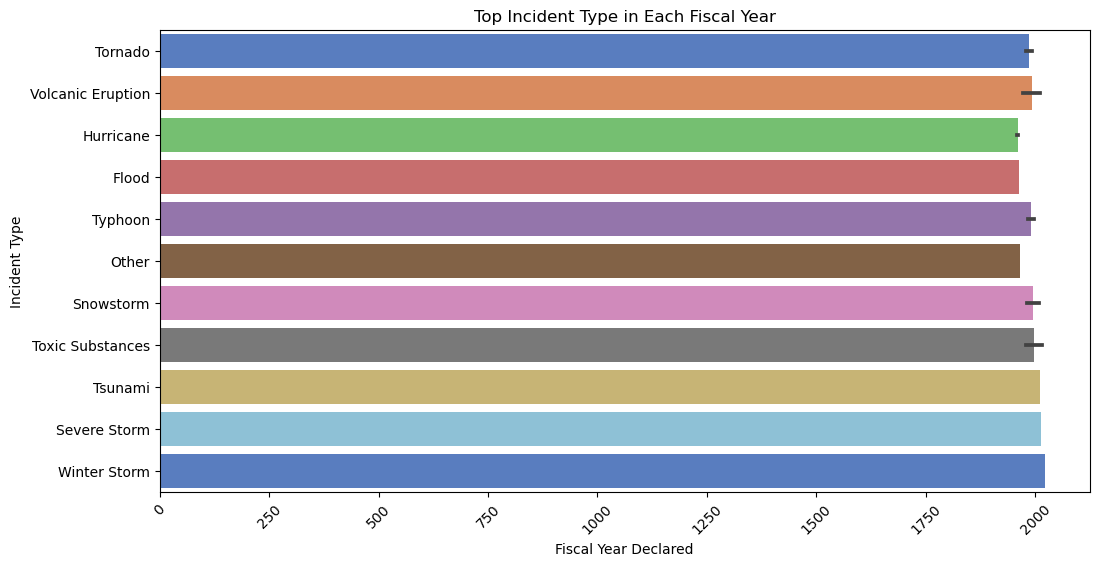

In [8]:
# Visualization 6: Bar plot of top incident_type in each fiscal year
top_incident_type_per_year = data.groupby('fy_declared')['incident_type'].max().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='fy_declared', y='incident_type', data=top_incident_type_per_year, palette='muted')
plt.title('Top Incident Type in Each Fiscal Year')
plt.xlabel('Fiscal Year Declared')
plt.ylabel('Incident Type')
plt.xticks(rotation=45)
plt.show()

## 6. Task: Create a Pairplot of Disaster Number, Fiscal Year Declared, Incident Type, and Declaration Request Number

Is there any noticeable correlation between disaster number, fiscal year declared, incident type, and declaration request number? How do these variables relate to each other?

- Is there any relationship or correlation between the numeric variables (disaster number, fiscal year, declaration request number) and incident type?

- Are there any outliers or unusual patterns in these variables?

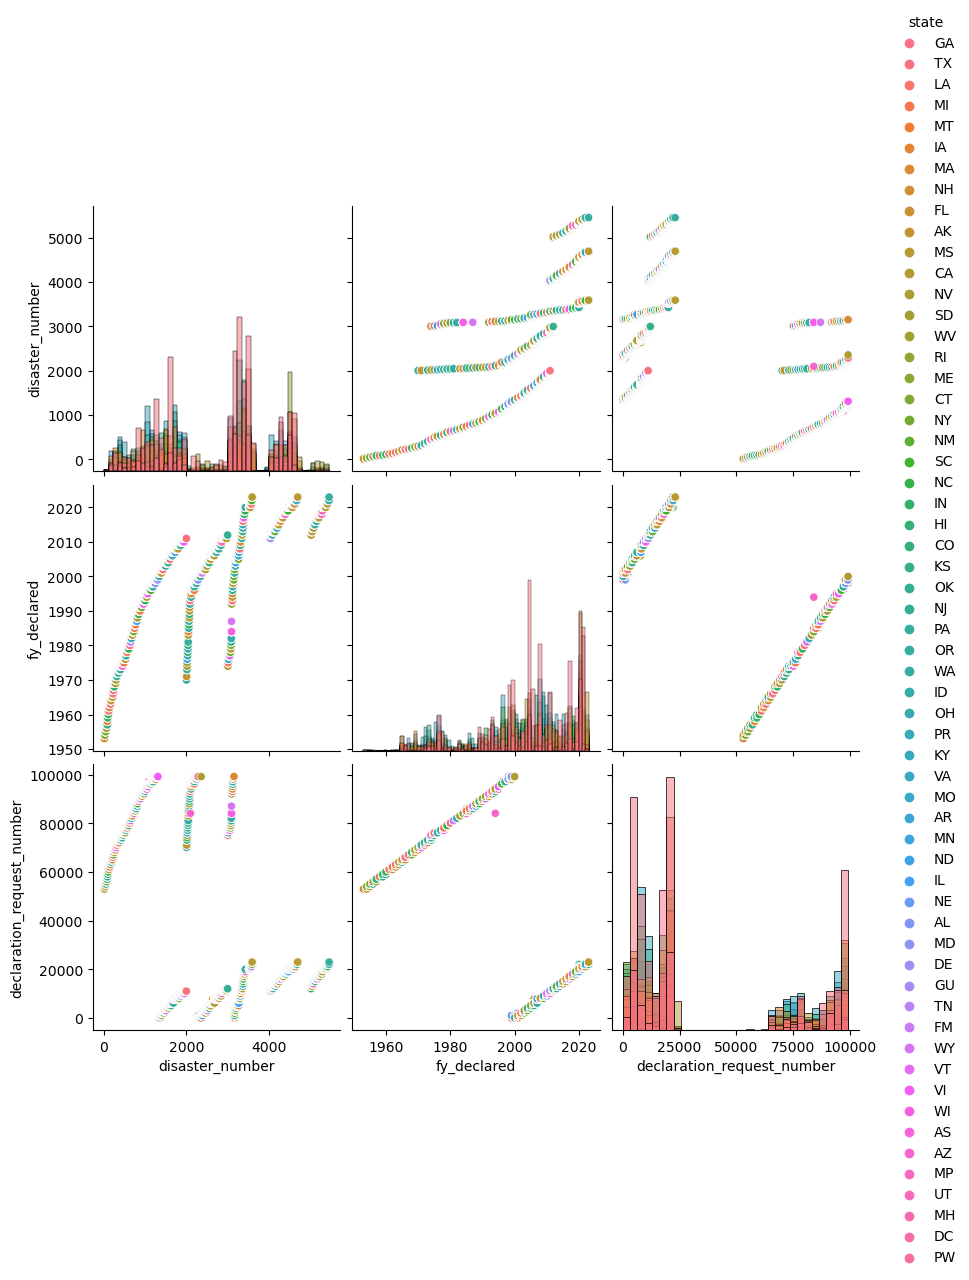

In [9]:
# Visualization 4: Pairplot of disaster_number, fy_declared, incident_type, and declaration_request_number
sns.pairplot(data[['disaster_number', 'fy_declared', 'incident_type', 'declaration_request_number', 'state']],
             hue='state', diag_kind='hist', height=3)
plt.show()


## 7. Task: Stacked Bar Plot - Incident Types by Declaration Type

How are incident types distributed across different declaration types? Which declaration type accounts for the most incidents of each type?

- How do the incident types vary across different declaration types?

- Which declaration type has the highest number of declarations for each incident type?


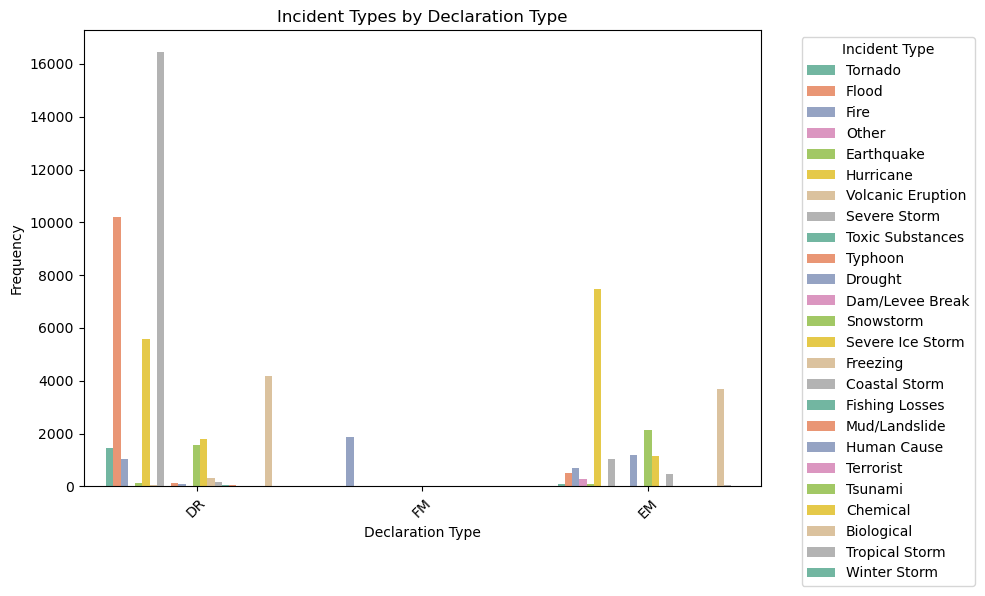

In [10]:
# Visualization 7: Stacked Bar Plot - Incident Types by Declaration Type
plt.figure(figsize=(10, 6))
sns.countplot(x='declaration_type', hue='incident_type', data=data, palette='Set2')
plt.title('Incident Types by Declaration Type')
plt.xlabel('Declaration Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 8. Task: Box Plot - Disaster Number by Declaration Type

Are there any differences in the distribution of disaster numbers based on the declaration type? What insights can we gain from comparing these distributions?

- What is the distribution of disaster numbers for each declaration type?

- Are there any differences in disaster numbers based on the declaration type?

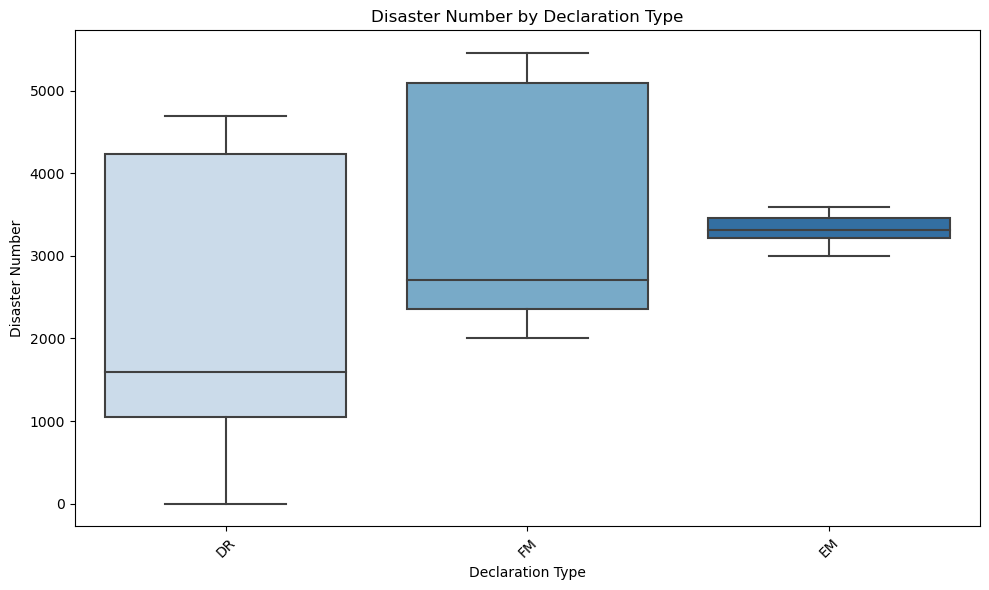

In [11]:
# Visualization 11: Box Plot - Disaster Number by Declaration Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='declaration_type', y='disaster_number', data=data, palette='Blues')
plt.title('Disaster Number by Declaration Type')
plt.xlabel('Declaration Type')
plt.ylabel('Disaster Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Task: Box Plot - Disaster Number by Declaration Type

Are there any differences in the distribution of disaster numbers based on the declaration type? What insights can we gain from comparing these distributions?

- Among the top five states facing disasters, how do the different declaration types proportionally contribute to the total count of declarations in each state?

- Is there a dominant declaration type for each top state?

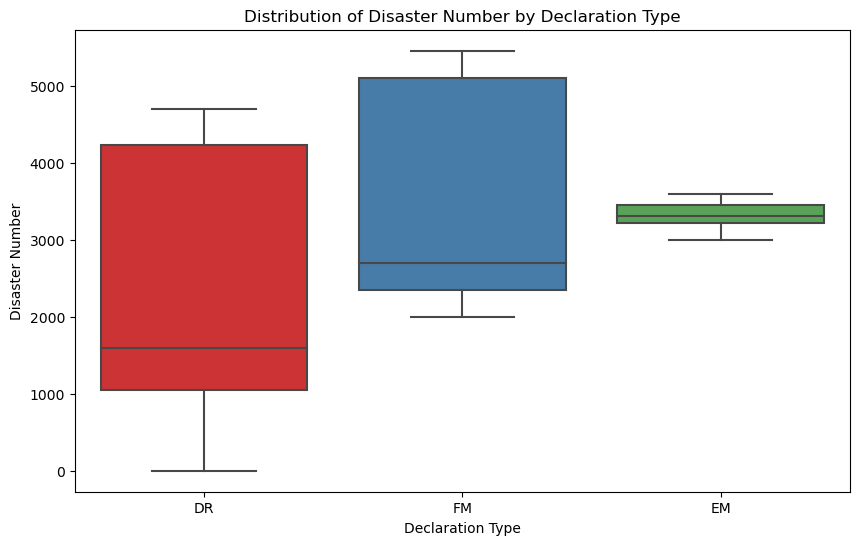

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='declaration_type', y='disaster_number', data=data, palette='Set1')
plt.title('Distribution of Disaster Number by Declaration Type')
plt.xlabel('Declaration Type')
plt.ylabel('Disaster Number')
plt.show()

## Count of Declarations by Incident Type and Declaration Type (Stacked Bar Plot)

This visualization aims to show the count of declarations for each incident type, categorized by the declaration type. The plot uses a stacked bar chart to represent the distribution of incidents across different declaration types.

Question:

- How do the different incident types vary in terms of the count of declarations?

- Among the incident types, which ones have the highest number of declarations, and which have the lowest?

- What proportion of declarations for each incident type belongs to different declaration types (e.g., emergency, fire, major disaster)?

- The stacked bar plot can help identify which declaration types are most common for specific incident types, and it allows for a visual comparison of the distribution of declaration types within each incident category.

<Figure size 1200x600 with 0 Axes>

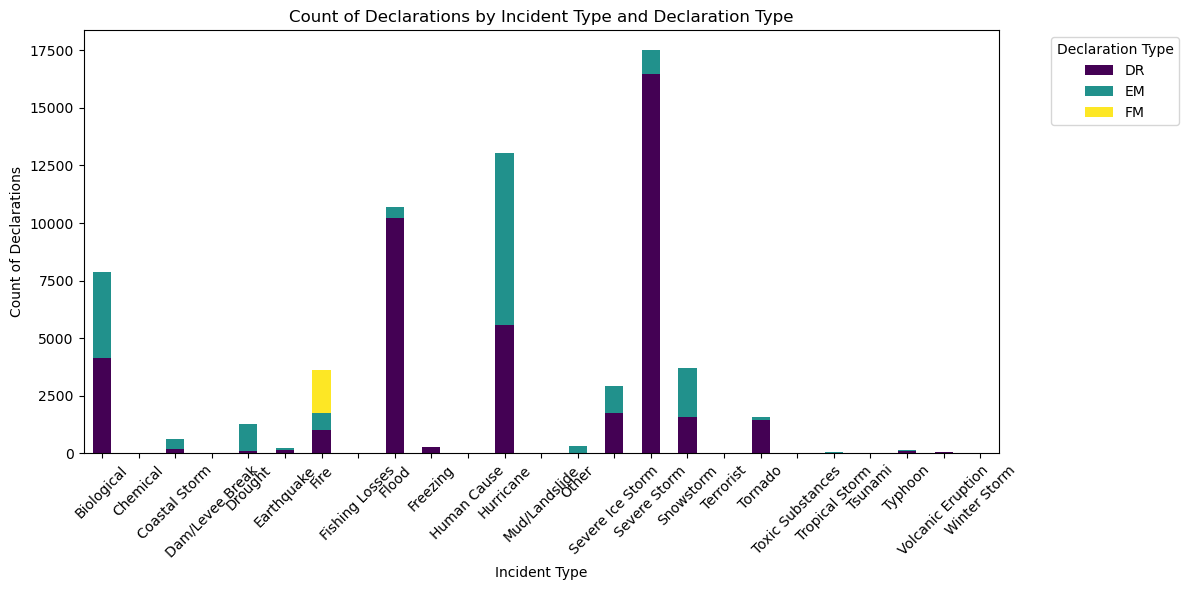

In [13]:
plt.figure(figsize=(12, 6))
ct = pd.crosstab(data['incident_type'], data['declaration_type'])
ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Count of Declarations by Incident Type and Declaration Type')
plt.xlabel('Incident Type')
plt.ylabel('Count of Declarations')
plt.xticks(rotation=45)
plt.legend(title='Declaration Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Proportion of Declaration Types in Top States

- Among the top five states facing disasters, how do the different declaration types proportionally contribute to the total count of declarations in each state?

- Is there a dominant declaration type for each top state?

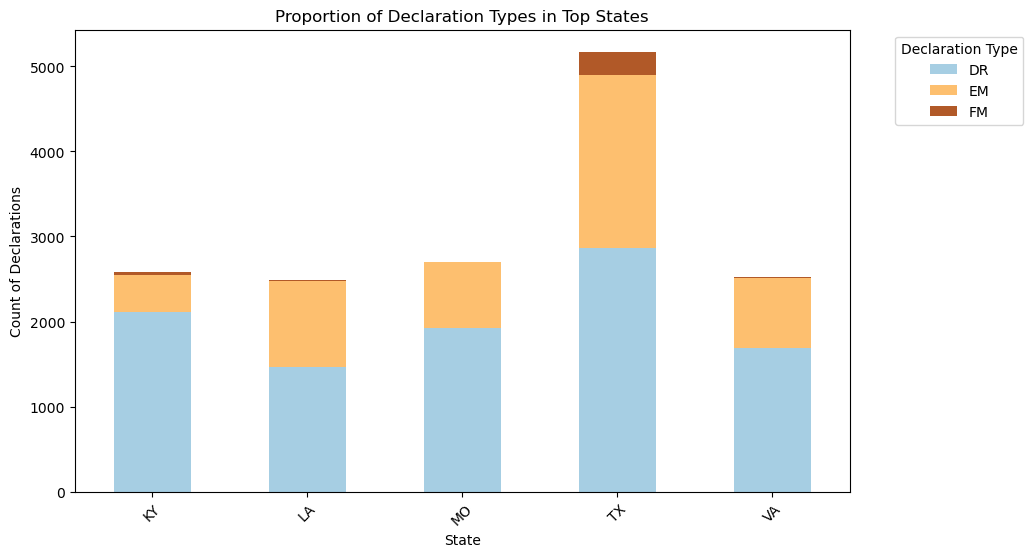

In [14]:
top_states = data['state'].value_counts().nlargest(5).index
top_states_data = data[data['state'].isin(top_states)]
declaration_type_counts = pd.crosstab(top_states_data['state'], top_states_data['declaration_type'])
declaration_type_counts.plot(kind='bar', stacked=True, colormap='Paired', figsize=(10, 6))
plt.title('Proportion of Declaration Types in Top States')
plt.xlabel('State')
plt.ylabel('Count of Declarations')
plt.legend(title='Declaration Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

## Pie Chart - Proportion of Declarations by Declaration Type

## Proportion of Declarations by Declaration Type (Pie Chart)

What is the overall distribution of declaration types in the dataset? What proportion of declarations corresponds to each declaration type

- Is there any strong correlation between numeric columns (variables) in the dataset?

- Are there any pairs of variables that exhibit a significant positive or negative correlation?

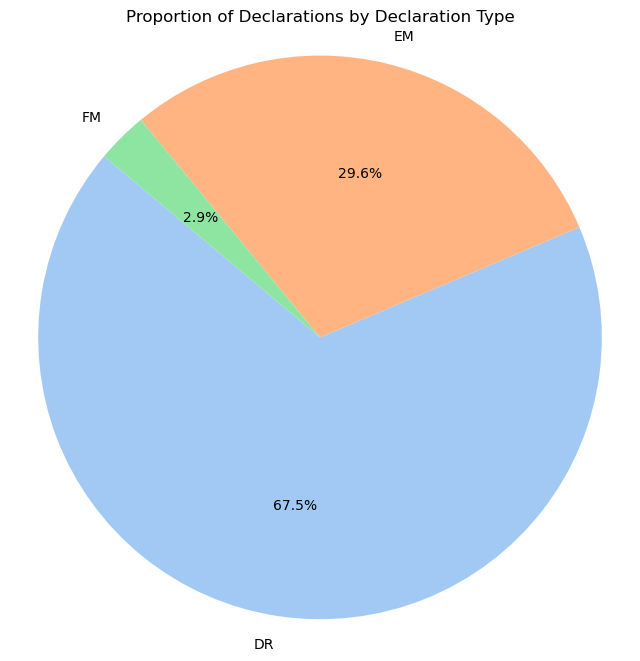

In [15]:
plt.figure(figsize=(8, 8))
declaration_type_counts = data['declaration_type'].value_counts()
plt.pie(declaration_type_counts, labels=declaration_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Declarations by Declaration Type')
plt.axis('equal')
plt.show()

## Heatmap - Correlation Matrix of Numeric Columns

11. Task: Correlation Matrix of Numeric Columns

Is there any significant correlation between numeric columns in the dataset? Which variables show the strongest positive/negative correlation

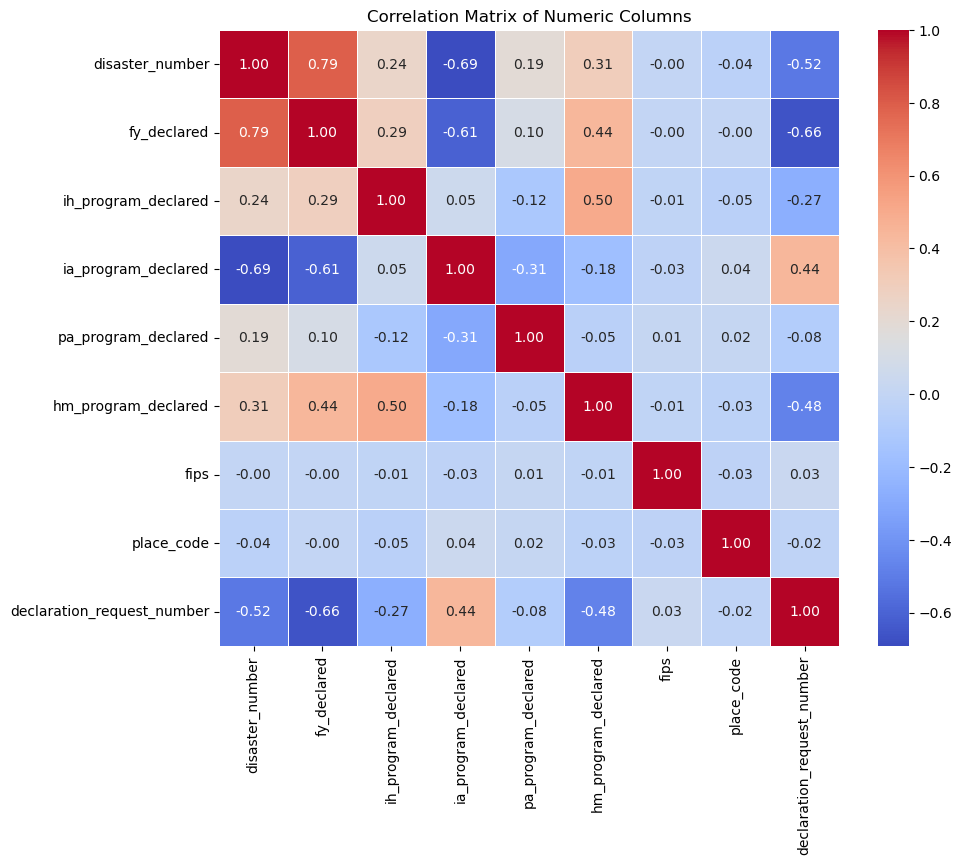

In [16]:
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

## Time Series Plot - Count of Declarations Over the Years

12. Task: Count of Declarations Over the Years (Line Plot)

How has the overall count of disaster declarations evolved over the years? Are there any noticeable patterns or spikes in specific years?

- How has the overall count of disaster declarations changed over the years?

- Are there any noticeable spikes or dips in declaration counts in specific years?

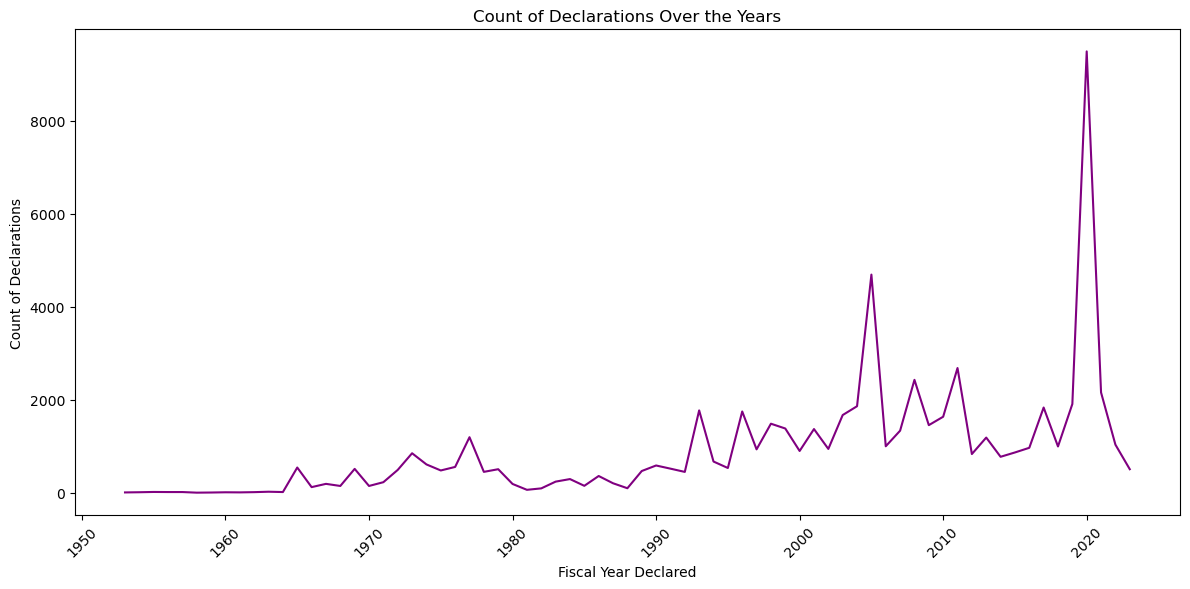

In [17]:
count_per_year = data['fy_declared'].value_counts().reset_index()
count_per_year.columns = ['fy_declared', 'count']

plt.figure(figsize=(12, 6))
sns.lineplot(x='fy_declared', y='count', data=count_per_year, color='purple')
plt.title('Count of Declarations Over the Years')
plt.xlabel('Fiscal Year Declared')
plt.ylabel('Count of Declarations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Box Plot - Distribution of Declaration Request Numbers by Declaration 

13. Task: Distribution of Declaration Request Numbers by Declaration Type (Box Plot)

How are declaration request numbers distributed across different declaration types? Do certain declaration types tend to have higher declaration request numbers than others?

- How does the distribution of declaration request numbers vary across different declaration types?

- Are certain declaration types associated with higher or lower declaration request numbers?

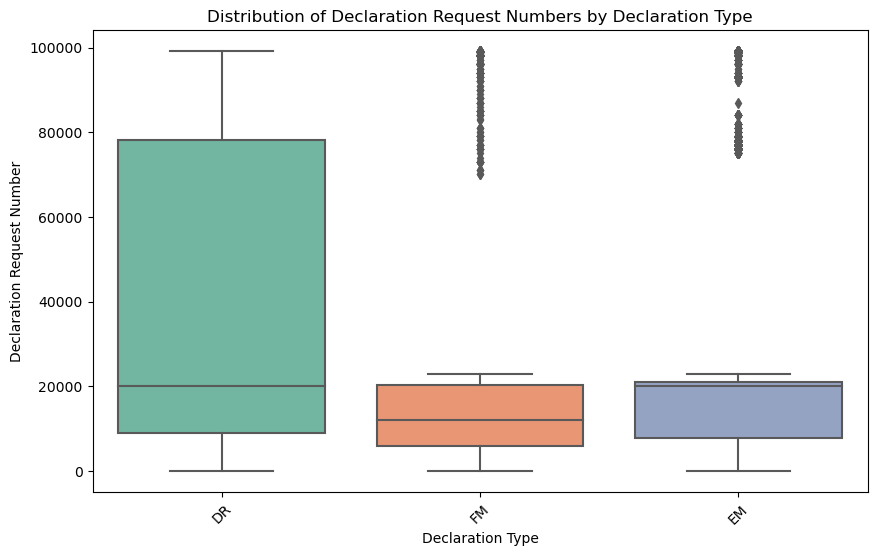

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='declaration_type', y='declaration_request_number', data=data, palette='Set2')
plt.title('Distribution of Declaration Request Numbers by Declaration Type')
plt.xlabel('Declaration Type')
plt.ylabel('Declaration Request Number')
plt.xticks(rotation=45)
plt.show()